In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../train.csv')

In [4]:
data_col = data[['Neighborhood', 'SalePrice', 'OverallCond']]

In [6]:
data_col.to_csv('~/Desktop/house_prices.csv')

In [45]:
data['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

<AxesSubplot:ylabel='Frequency'>

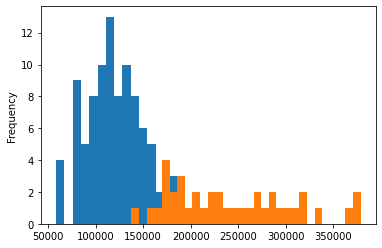

In [168]:
college_nbhood=data[(data["Neighborhood"] == "Edwards")]
no_ridge_nbhood = data[(data["Neighborhood"] == "Timber")]
sub_nbhood = data[(data["Neighborhood"] == "Edwards") | (data["Neighborhood"] == "Timber")]
college_nbhood["SalePrice"].plot.hist(bins=30, )
no_ridge_nbhood["SalePrice"].plot.hist(bins=30, )

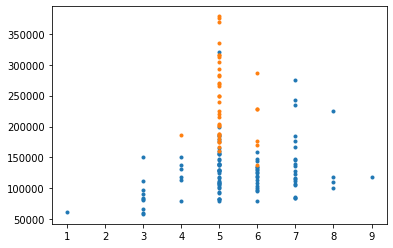

In [182]:
plt.plot(college_nbhood['OverallCond'], college_nbhood['SalePrice'], '.')
plt.plot(no_ridge_nbhood['OverallCond'], no_ridge_nbhood['SalePrice'], '.')
plt.show()

False


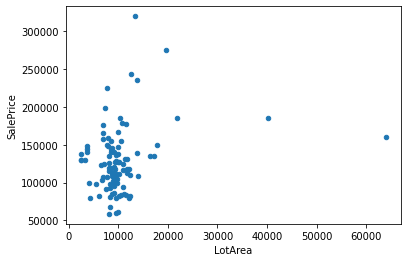

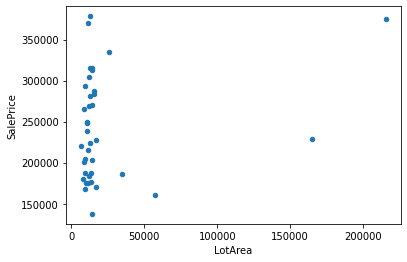

In [170]:
ax1 = college_nbhood.plot.scatter(x='LotArea', y='SalePrice')
ax2 = no_ridge_nbhood.plot.scatter(x='LotArea', y='SalePrice')
print(ax1==ax2)

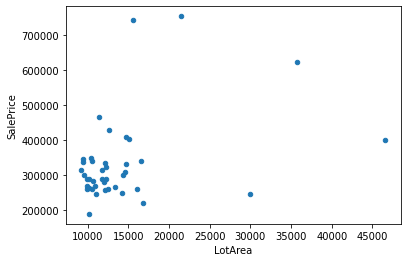

In [104]:
ax2 = no_ridge_nbhood.plot.scatter(x='LotArea', y='SalePrice')

In [204]:
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.preprocessing import MinMaxScaler

In [363]:
param_space = {
    'kernel': ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine'], # Add available kernels
    'bandwidth': np.linspace(0.1, 10, 100), # Define Search space for bandwidth parameter
}

def hyperopt_by_score(X_train, param_space, cv=5):
    kde = KernelDensity()

    search = RandomizedSearchCV(
        estimator=kde,
        param_distributions=param_space,
        n_iter=100,
        cv=cv,
        scoring=None # use estimators internal scoring function, i.e. the log-probability of the validation set for KDE
    )

    search.fit(X_train)
    return search.best_params_, search.best_estimator_

In [364]:
data = college_nbhood[['LotArea', 'SalePrice', 'OverallCond']]
X_train, X_test = train_test_split(data, test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_test = np.array([0]*len(X_test))


In [365]:
params, kde = hyperopt_by_score(X_train, param_space)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [-100.12667366  -92.06480093  -52.43538719  -49.29073264  -86.97048292
 -146.28429558 -105.30696502 -125.64176718  -84.52316579  -78.7498302
 -102.39899715 -107.29577138 -106.51936812  -71.26742863 -101.0308075
 -130.94505376  -45.4540608  -144.54016611 -115.25403371 -108.11630418
  -75.32998968  -92.94638078  -48.78828351  -11.22878576  -92.23875918
  -50.78151492 -131.7243394   -72.20983329  -15.84814708  -68.62496797
  -71.09790767 -104.06322183  -69.70879639  -22.6856672           -inf
          -inf -155.00003315  -29.6959658  -107.3975027   -77.30424922
 -147.80766804 -152.13297467  -63.96023006  -73.26036894  -35.51207603
 -142.73032611  -14.37341832 -151.67918647  -82.09754574  -57.08399456
  -65.6978042   -97.20159175 -102.05420536 -147.41283479 -109.87952565
 -150.93642243  -82.67031524 -105.65835679 

In [366]:
# X_test = np.append(X_test, no_ridge_nbhood[['LotArea', 'SalePrice', 'OverallCond']], 0)
X_test = no_ridge_nbhood[['LotArea', 'SalePrice', 'OverallCond']]
# y_test = np.append(y_test, [1]*len(no_ridge_nbhood), 0)
X_test = scaler.transform(X_test)


(array([ 1.,  0.,  1.,  0.,  0.,  1.,  0.,  4., 14., 59.]),
 array([-3.04902672, -2.68714432, -2.32526192, -1.96337953, -1.60149713,
        -1.23961473, -0.87773234, -0.51584994, -0.15396755,  0.20791485,
         0.56979725]),
 <BarContainer object of 10 artists>)

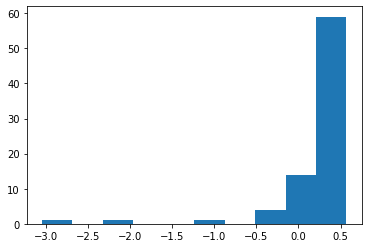

In [367]:
train_scores = kde.score_samples(X_train)
plt.hist(train_scores)

In [370]:
from exercise_tools import evaluate

print('Best parameters:')
for key in params:
    print('{}: {}'.format(key, params[key]))

test_scores = kde.score_samples(X_test)


Best parameters:
kernel: linear
bandwidth: 0.7000000000000001


In [372]:
test_scores < -0

array([False, False,  True,  True, False,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True])

In [342]:
train_scores

array([ 4.18900804e-02,  6.50003002e-01,  3.14822614e-01, -1.93420944e-03,
        6.11750580e-01,  6.48741801e-01,  5.25418193e-01,  4.86118928e-01,
        7.43535416e-02,  4.13353384e-01, -1.57542638e-01,  5.81931075e-01,
        3.35708074e-01,  6.40959802e-01,  3.13751627e-01,  1.65375098e-01,
       -1.10504504e+00,  5.01550833e-01,  5.84944800e-01,  6.12227146e-01,
        4.67503126e-01,  2.75797571e-01,  5.91022760e-01,  4.34429810e-01,
        5.40050995e-01,  1.75694308e-01,  1.82171791e-01,  4.87952546e-01,
        3.34340547e-01, -1.15523252e+00, -1.66464246e-01, -3.60988353e-02,
        3.31605863e-01,  5.21162567e-01, -1.89099870e-01,  1.39750105e-01,
        1.97584897e-01,  2.68795787e-02, -1.60171602e+00,  6.23918073e-01,
        6.16571233e-01, -5.39376883e-01,  3.90810975e-01,  2.90217514e-01,
        6.43020261e-01,  6.42396091e-01,  5.03096411e-01,  6.24137867e-01,
       -7.46812796e-01,  5.24522375e-01, -2.05888586e-01,  4.26283002e-01,
        3.96197885e-01,  

In [310]:
import itertools as it
def visualize_kde(kernel, bandwidth, X_train, y_train):
    fig, axis = plt.subplots(figsize=(5, 5))
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(X_train)

    lin = np.linspace(-10, 10, 50)
    grid_points = list(it.product(lin, lin))
    ys, xs = np.meshgrid(lin, lin)
    # The score function of sklearn returns log-densities
    scores = np.exp(kde.score_samples(grid_points)).reshape(50, 50)
    colormesh = axis.contourf(xs, ys, scores)
    fig.colorbar(colormesh)
    axis.set_title('Density Conturs (Bandwidth={})'.format(bandwidth))
    axis.set_aspect('equal')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
    plt.show()

ValueError: query data dimension must match training data dimension

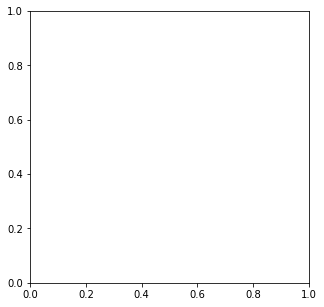

In [311]:
visualize_kde(params['kernel'], params['bandwidth'], X_test, y_test)

In [20]:
from sklearn.model_selection import train_test_split
neighborhood = 'CollgCr'
anomaly_neighborhood='NoRidge'
house_data = pd.read_csv('../data/house_prices/house_prices.csv')
neighborhood_data = house_data[house_data["Neighborhood"] == neighborhood].drop(columns=['Neighborhood'])

In [19]:
house_data

,Unnamed: 0,SalePrice,OverallCond
0,0,208500,5
2,2,223500,5
13,13,279500,5
22,22,230000,5
32,32,179900,5
...,...,...,...
1410,1410,230000,5
1422,1422,136500,5
1441,1441,149300,5
1444,1444,179600,5


In [17]:
X_train, X_test = train_test_split(neighborhood_data, test_size=0.2)
X_anomalies = house_data[house_data["Neighborhood"] == anomaly_neighborhood].drop(columns=['Neighborhood'])
y_test = [0]*len(X_test) + [1]*len(X_anomalies)
X_test = X_test.append(X_anomalies, ignore_index=True)

In [21]:
house_data = pd.read_csv('../data/house_prices/house_prices.csv')

In [23]:
house_data.drop(columns=['Unnamed: 0']).to_csv('house_data_2.csv', index=False)